# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

## 서울시 구별 인구 현황

### 서울시 통계DB
- http://stat.seoul.go.kr/jsp3/index.jsp
- 서울에서 인구수가 많으면 고령비율도 높을까?

In [1]:
% matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6)

from IPython.display import Image

reference = lambda file, w=None, h=None : \
    Image(filename=file, width=w, height=h) 
    
stat_01 = './images/DC_stat_seoul_population.png'

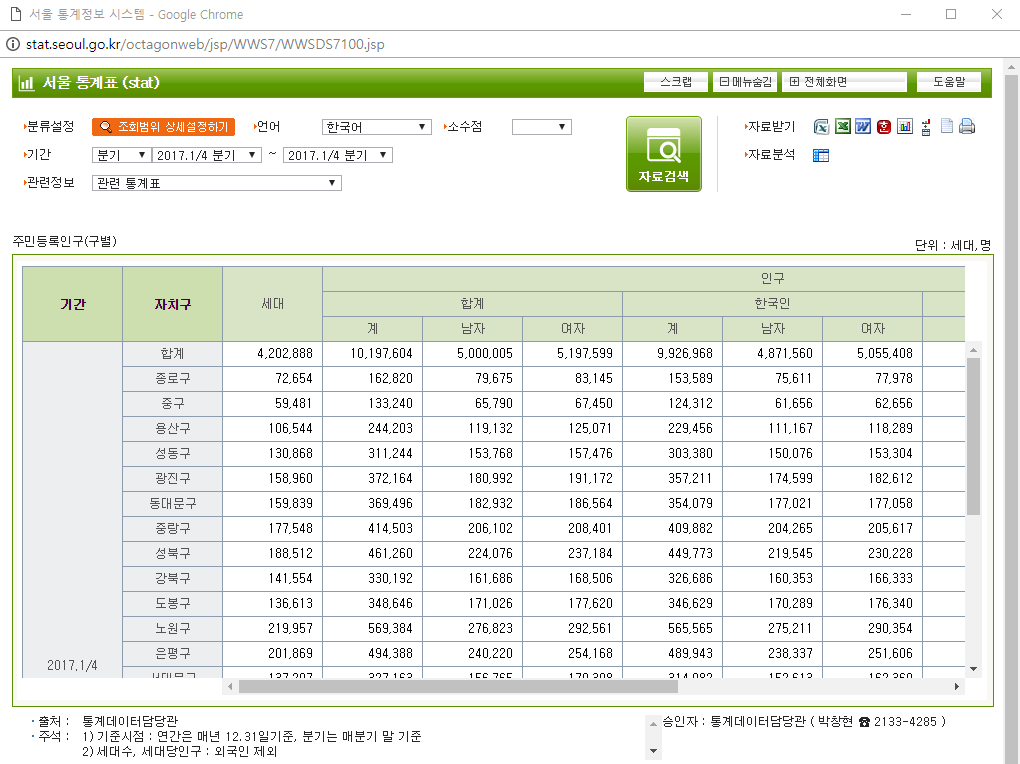

In [3]:
Image(stat_01)

In [4]:
population = pd.read_excel('data/Report_2018_1Q.xls', 
                     header=2,
                     parse_cols="B, C, D, M, N"
                    )
population.head()

,자치구,세대,계,세대당인구,65세이상고령자
0,합계,4237610,10112070,2.32,1382420
1,종로구,73879,164348,2.09,26429
2,중구,60903,135139,2.07,21655
3,용산구,108497,245411,2.12,37238
4,성동구,134543,314551,2.28,41752


In [5]:
population.tail()

,자치구,세대,계,세대당인구,65세이상고령자
21,관악구,258536,522292,1.95,70807
22,서초구,174225,445164,2.53,54055
23,강남구,231219,557865,2.39,65859
24,송파구,266550,671994,2.50,77978
25,강동구,177490,438225,2.45,56983


#### <font color='blue'> # unique 체크후, 합계오 nan 부분을 drop </font>

In [6]:
population['자치구'].unique()

array(['합계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [7]:
population = population.drop([0])
population

,자치구,세대,계,세대당인구,65세이상고령자
1,종로구,73879,164348,2.09,26429
2,중구,60903,135139,2.07,21655
3,용산구,108497,245411,2.12,37238
4,성동구,134543,314551,2.28,41752
5,광진구,161407,371671,2.21,44470
6,동대문구,160489,364962,2.18,56284
7,중랑구,179600,411552,2.27,59992
8,성북구,187234,453902,2.36,66896
9,강북구,143139,327511,2.26,57002
10,도봉구,137479,345041,2.49,54293


In [8]:
population['자치구'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [9]:
population.rename(columns = {'계':'인구수'}, inplace=True)
population.rename(columns = {'자치구':'구'}, inplace=True)
population.head()

,구,세대,인구수,세대당인구,65세이상고령자
1,종로구,73879,164348,2.09,26429
2,중구,60903,135139,2.07,21655
3,용산구,108497,245411,2.12,37238
4,성동구,134543,314551,2.28,41752
5,광진구,161407,371671,2.21,44470


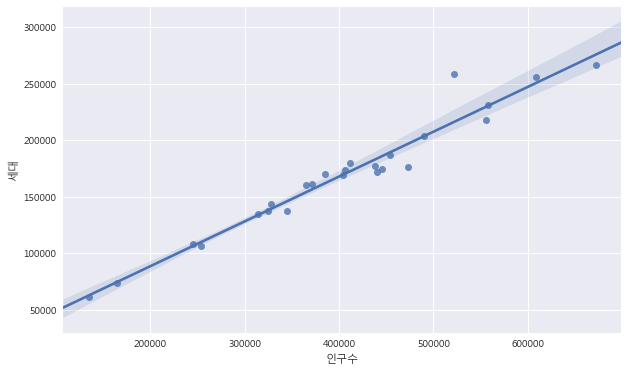

In [10]:
sns.regplot(x="인구수", y="세대", data=population);

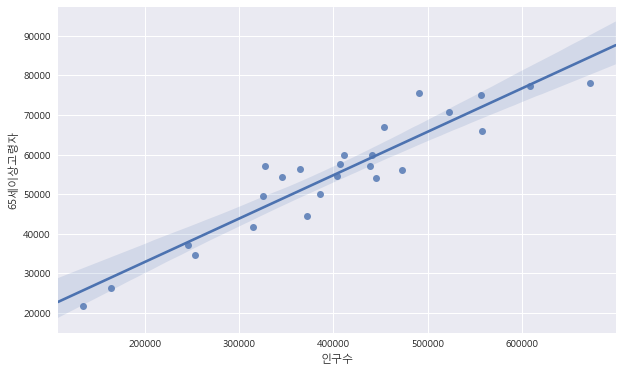

In [11]:
sns.regplot(x="인구수", y="65세이상고령자", data=population);

### <font color='blue'> 참조.  https://github.com/southkorea/southkorea-maps/tree/master/kostat/2013/json </font>

In [12]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [13]:
geo_path = 'data/skorea_municipalities_geo_simple.json'

geo_str = json.load(open(geo_path, encoding='utf-8'))
# geo_str

In [14]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['인구수']})
guDat.head()

,counts,gu
1,164348,종로구
2,135139,중구
3,245411,용산구
4,314551,성동구
5,371671,광진구


In [15]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=12)
map

In [16]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
map

In [17]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='YlGnBu', #PuRd, YlGnBu
              key_on='feature.id')

In [18]:
map

In [19]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')

In [20]:
map

In [21]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['65세이상고령자']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')

In [22]:
map

In [23]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['세대당인구']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')


In [24]:
map

In [25]:
population['고령비율'] = population['65세이상고령자'] / population['인구수'] * 100
population.head()

,구,세대,인구수,세대당인구,65세이상고령자,고령비율
1,종로구,73879,164348,2.09,26429,16.081121
2,중구,60903,135139,2.07,21655,16.024242
3,용산구,108497,245411,2.12,37238,15.173729
4,성동구,134543,314551,2.28,41752,13.273523
5,광진구,161407,371671,2.21,44470,11.964883


In [26]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['고령비율']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')

In [27]:
map

In [28]:
population.sort_values(by='65세이상고령자', ascending=False).head(5)

,구,세대,인구수,세대당인구,65세이상고령자,고령비율
24,송파구,266550,671994,2.50,77978,11.603973
16,강서구,256042,608361,2.35,77381,12.719586
12,은평구,203431,490253,2.39,75535,15.407351
11,노원구,217999,555803,2.53,75081,13.508563
21,관악구,258536,522292,1.95,70807,13.556976


In [29]:
population.sort_values(by='인구수', ascending=False).head(5)

,구,세대,인구수,세대당인구,65세이상고령자,고령비율
24,송파구,266550,671994,2.50,77978,11.603973
16,강서구,256042,608361,2.35,77381,12.719586
23,강남구,231219,557865,2.39,65859,11.805544
11,노원구,217999,555803,2.53,75081,13.508563
21,관악구,258536,522292,1.95,70807,13.556976


In [30]:
population.sort_values(by='세대당인구', ascending=False).head(5)

,구,세대,인구수,세대당인구,65세이상고령자,고령비율
15,양천구,176559,473087,2.66,56070,11.851943
22,서초구,174225,445164,2.53,54055,12.142716
11,노원구,217999,555803,2.53,75081,13.508563
24,송파구,266550,671994,2.50,77978,11.603973
10,도봉구,137479,345041,2.49,54293,15.735231


In [31]:
population.sort_values(by='고령비율', ascending=False).head(5)

,구,세대,인구수,세대당인구,65세이상고령자,고령비율
9,강북구,143139,327511,2.26,57002,17.404606
1,종로구,73879,164348,2.09,26429,16.081121
2,중구,60903,135139,2.07,21655,16.024242
10,도봉구,137479,345041,2.49,54293,15.735231
6,동대문구,160489,364962,2.18,56284,15.421880


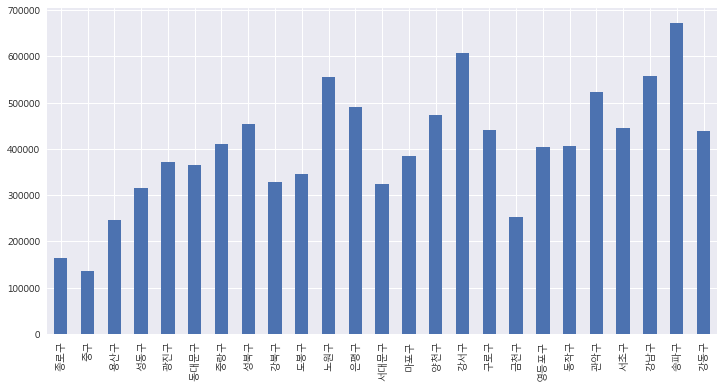

In [32]:
plt.rcParams["figure.figsize"] = [12,6]
df_population = pd.Series(population['인구수'].values, index=population['구'].values)
df_population.plot(kind='bar')

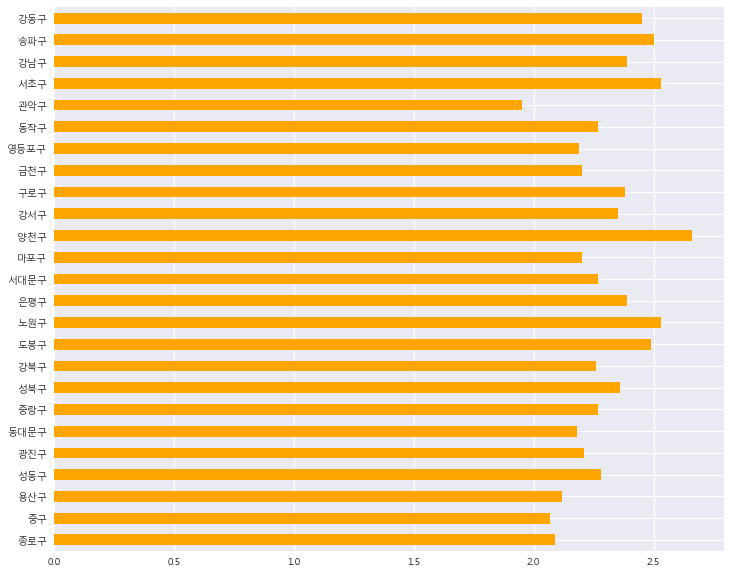

In [33]:
plt.rcParams["figure.figsize"] = [12,10]
df_population = pd.Series(population['세대당인구'].values, index=population['구'].values)
df_population.plot(kind='barh', color='orange')


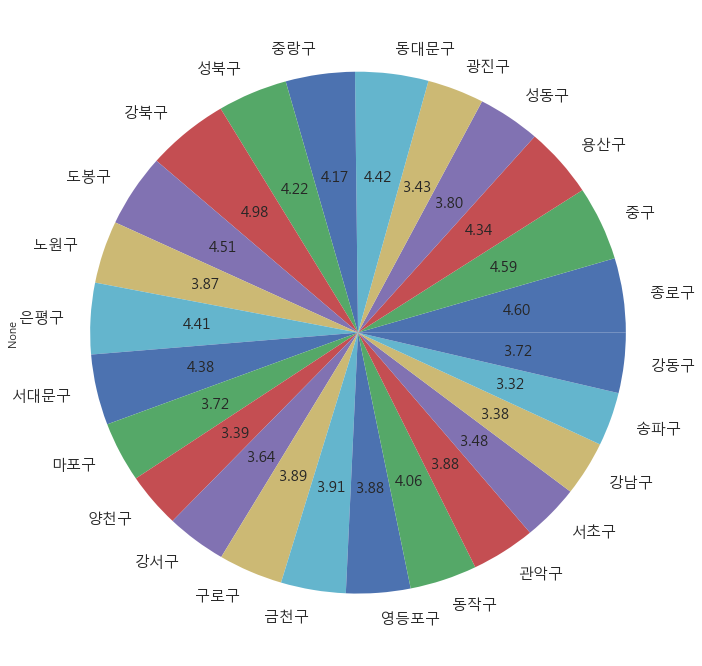

In [34]:
plt.rcParams["figure.figsize"] = [12,12]
df_population = pd.Series(population['고령비율'].values, index=population['구'].values)
df_population.plot(kind='pie', autopct='%.2f', fontsize=15)

In [35]:
population.to_csv('data/seoul_population.csv', sep=',', index=False, encoding='euc-kr')

In [36]:
# % ls data

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>